#About the Dataset
##1. Introduction

In this document, we explore a dataset designed for association rules mining, a key technique in market basket analysis. The dataset includes various items typically found in retail transactions. Each item is represented as a binary variable, with "1" meaning the item is present and "0" meaning it is absent in individual transactions.

##2. Dataset Overview



Our dataset unfolds as a rich tapestry of distinct columns, each dedicated to representing a specific item:

* Bread
* Honey
* Bacon
* Toothpaste
* Banana
* Apple
* Hazelnut
* Cheese
* Meat
* Carrot
* Cucumber
* Onion
* Milk
* Butter
* ShavingFoam
* Salt
* Flour
* HeavyCream
* Egg
* Olive
* Shampoo
* Sugar

##3. Purpose of the Dataset
The purpose of this dataset is to uncover complex associations and patterns hidden within the network of customer transactions. Each row in the dataset represents a single transaction, and the values in each column indicate whether a particular item was included in the transaction or not.

##4. Data Format
The data in this repository is presented in binary form: "1" means an item was purchased, and "0" means it was not. This simple binary format highlights whether an item is present in a transaction, rather than how many of each item were bought.








#Importing Necessary Libraries

In [1]:
import pandas as pd #Pandas is a powerful library for data manipulation and analysis.
import numpy as np #NumPy is a powerful tool for numerical computations in Python.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns #Seaborn is a statistical data visualization library based on Matplotlib.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


####The code df = pd.read_csv('market.csv') reads the data from the file market.csv and loads it into a DataFrame named df. We can then use this DataFrame to analyze and manipulate the data.

In [2]:
markt= pd.read_csv('market.csv') #Reading the data.

In [3]:
markt #Displays the actual data present in the csv file.

,Bread;Honey;Bacon;Toothpaste;Banana;Apple;Hazelnut;Cheese;Meat;Carrot;Cucumber;Onion;Milk;Butter;ShavingFoam;Salt;Flour;HeavyCream;Egg;Olive;Shampoo;Sugar
0,1;0;1;0;1;1;1;0;0;1;0;0;0;0;0;0;0;1;1;0;0;1
1,1;1;1;0;1;1;1;0;0;0;1;0;1;1;0;0;1;0;0;1;1;0
2,0;1;1;1;1;1;1;1;1;0;1;1;1;0;1;1;1;1;1;0;0;1
3,1;1;0;1;0;1;0;0;0;0;1;1;1;0;0;0;1;0;1;1;1;0
4,0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
...,...
459,0;1;1;0;0;1;1;1;1;1;0;1;1;1;0;0;1;1;1;1;1;0
460,0;0;1;0;0;0;1;0;1;0;0;0;0;0;1;0;0;0;1;0;0;1
461,0;0;0;0;0;1;0;1;1;0;0;0;1;0;0;0;0;0;1;0;0;0
462,1;0;0;1;1;0;1;1;0;1;1;0;1;0;0;0;1;0;1;1;0;1


####So looking in the above data frame we can see that the data maintained is not in the correct order as the names of the items i.e columns are all in one cell, and as well as the data present in the rows are also in one single cell, making it very hard to extract any insights from the data set.

In [4]:
markt.columns #Displays the names of the columns.

Index(['Bread;Honey;Bacon;Toothpaste;Banana;Apple;Hazelnut;Cheese;Meat;Carrot;Cucumber;Onion;Milk;Butter;ShavingFoam;Salt;Flour;HeavyCream;Egg;Olive;Shampoo;Sugar'], dtype='object')

####As we can check the names of the items in the columns are in the same cell and only separated by the semicolon ';', same is with the following rows in the same cell, so we have clean and separate the data as we can go through the rows and column and can work on data manipulation and data analysis.

In [5]:
file_path = 'market.csv' #This line assigns the string 'market.csv' to the variable file_path
with open(file_path, 'r') as file: #open(file_path, 'r'): This function opens the file specified by file_path in read mode ('r'). Opening a file in read mode means you can only read its contents, not modify it.
    lines = file.readlines() #file.readlines(): This method reads all the lines from the file and returns them as a list of strings.

In [6]:
# The first line is the header
header = lines[0].strip().split(';')

###The line header = lines[0].strip().split(';') processes the first line of the file to extract and format the column names.

###lines[0]:

####This accesses the first line of the list lines, which was created by file.readlines(). In the context of a CSV file, this first line typically contains the column headers.

###.split(';'):

####The split(';') method divides the string into a list of substrings based on the delimiter specified—in this case, a semicolon (;).

###header =:

####This assigns the resulting list of column names to the variable header.

In [7]:
# The rest are the data rows
data = [line.strip().split(';') for line in lines[1:]]

# Create a DataFrame
df = pd.DataFrame(data, columns=header)

###The line data = [line.strip().split(';') for line in lines[1:]] is a Python list comprehension that processes the lines of a CSV file to extract and format the data

###lines[1:]:

####lines: A list of strings where each string represents a line from the CSV file.

###for line in lines[1:]:

####This part of the list comprehension iterates over each line in the sliced list (lines[1:])

###line.strip():

####line.strip(): Removes leading and trailing whitespace characters, including the newline character (\n), from the current line

###line.strip().split(';'):

####split(';'): Splits the stripped line into a list of substrings using the semicolon (;) as the delimiter.

In [8]:
df #Displaying the new dataframe.

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,0,0,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
460,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
461,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
462,1,0,0,1,1,0,1,1,0,1,...,1,0,0,0,1,0,1,1,0,1


In [9]:
df.columns # Displays the names of the columns

Index(['Bread', 'Honey', 'Bacon', 'Toothpaste', 'Banana', 'Apple', 'Hazelnut',
       'Cheese', 'Meat', 'Carrot', 'Cucumber', 'Onion', 'Milk', 'Butter',
       'ShavingFoam', 'Salt', 'Flour', 'HeavyCream', 'Egg', 'Olive', 'Shampoo',
       'Sugar'],
      dtype='object')

In [10]:
df.shape # Displays the total count of the Rows and Columns of the dataset respectively.

(464, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        464 non-null    object
 1   Honey        464 non-null    object
 2   Bacon        464 non-null    object
 3   Toothpaste   464 non-null    object
 4   Banana       464 non-null    object
 5   Apple        464 non-null    object
 6   Hazelnut     464 non-null    object
 7   Cheese       464 non-null    object
 8   Meat         464 non-null    object
 9   Carrot       464 non-null    object
 10  Cucumber     464 non-null    object
 11  Onion        464 non-null    object
 12  Milk         464 non-null    object
 13  Butter       464 non-null    object
 14  ShavingFoam  464 non-null    object
 15  Salt         464 non-null    object
 16  Flour        464 non-null    object
 17  HeavyCream   464 non-null    object
 18  Egg          464 non-null    object
 19  Olive        464 non-null    

####The df.info() method in pandas provides a summary of a DataFrame's structure and contents. This method is useful for understanding the basic characteristics of your data, such as the number of rows, the number of columns, and the types of data in each column.

In [12]:
df.isnull().sum() # Displays the total count of the null valuesin the particular columns.

Bread          0
Honey          0
Bacon          0
Toothpaste     0
Banana         0
Apple          0
Hazelnut       0
Cheese         0
Meat           0
Carrot         0
Cucumber       0
Onion          0
Milk           0
Butter         0
ShavingFoam    0
Salt           0
Flour          0
HeavyCream     0
Egg            0
Olive          0
Shampoo        0
Sugar          0
dtype: int64

####As we can check there is no null data in the dataset.

In [13]:
df.dtypes #Displays the type of data.

Bread          object
Honey          object
Bacon          object
Toothpaste     object
Banana         object
Apple          object
Hazelnut       object
Cheese         object
Meat           object
Carrot         object
Cucumber       object
Onion          object
Milk           object
Butter         object
ShavingFoam    object
Salt           object
Flour          object
HeavyCream     object
Egg            object
Olive          object
Shampoo        object
Sugar          object
dtype: object

The above data is in the object form, so it becomes necessary to convert the data, so the data is available for the analysis.


In [14]:
df = df.astype(int) #Converting all the columns in one line.


In [15]:
df.dtypes

Bread          int64
Honey          int64
Bacon          int64
Toothpaste     int64
Banana         int64
Apple          int64
Hazelnut       int64
Cheese         int64
Meat           int64
Carrot         int64
Cucumber       int64
Onion          int64
Milk           int64
Butter         int64
ShavingFoam    int64
Salt           int64
Flour          int64
HeavyCream     int64
Egg            int64
Olive          int64
Shampoo        int64
Sugar          int64
dtype: object

As we can check now the data is now available in int form.

In [16]:
df.mean() #checking the average of the items.

Bread          0.407328
Honey          0.415948
Bacon          0.431034
Toothpaste     0.383621
Banana         0.448276
Apple          0.405172
Hazelnut       0.420259
Cheese         0.443966
Meat           0.387931
Carrot         0.413793
Cucumber       0.381466
Onion          0.379310
Milk           0.370690
Butter         0.375000
ShavingFoam    0.405172
Salt           0.398707
Flour          0.385776
HeavyCream     0.415948
Egg            0.403017
Olive          0.381466
Shampoo        0.366379
Sugar          0.366379
dtype: float64

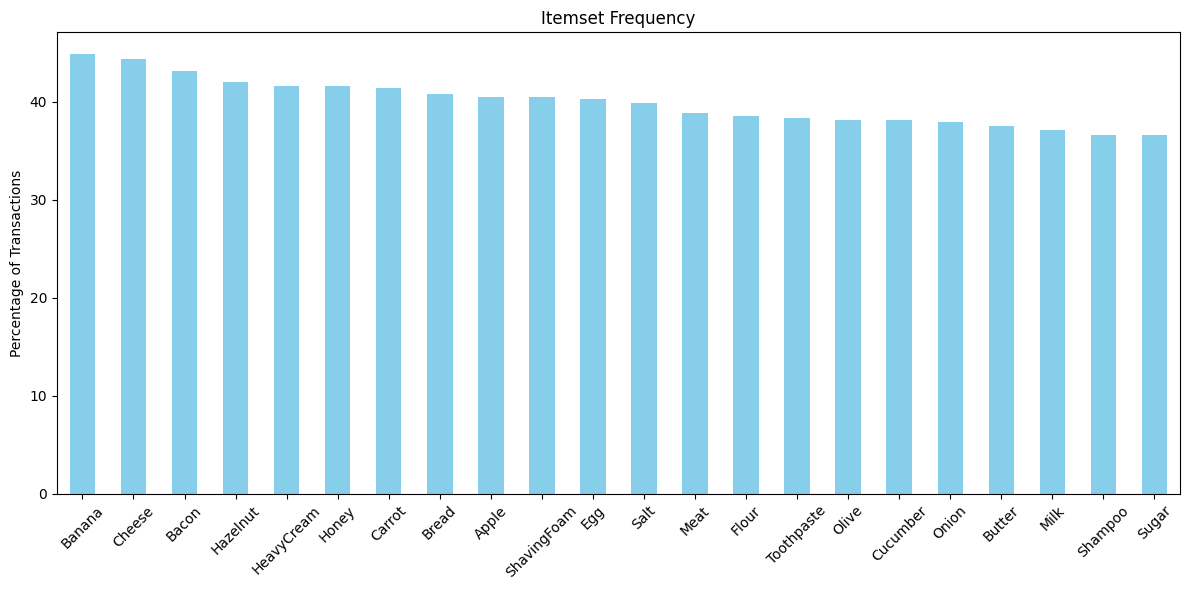

In [17]:
# Calculate itemset frequency (percentage of transactions where each item was purchased)
itemset_frequency = df.mean() * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
itemset_frequency.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Itemset Frequency')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Calculate the size of each itemset (number of items in each transaction)
itemset_sizes = df.sum(axis=1)

# Create a DataFrame for the histogram data
histogram_data = pd.DataFrame({'Itemset Size': itemset_sizes})

# Create an interactive histogram using Plotly Express
fig = px.histogram(histogram_data, x='Itemset Size', nbins=max(itemset_sizes) - 1, labels={'Itemset Size': 'Number of Items in Transaction'})
fig.update_layout(
    title='Itemset Size Distribution',
    xaxis_title='Number of Items in Transaction',
    yaxis_title='Frequency',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
    bargap=0.05  # Adjust the gap between bars
)

fig.show()

#Frequently purchased items

In [19]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, #df: This is the input DataFrame containing the transactional data
                            min_support = 0.2, #Setting min_support to 0.2 means that only itemsets appearing in at least 20% of the transactions will be considered frequent.
                            max_len = 3, # This limits the maximum length of the itemsets to be considered. In this case, only itemsets with up to 3 items will be generated.
                            use_colnames = True)

In [20]:
frequent_itemsets

,support,itemsets
0,0.407328,(Bread)
1,0.415948,(Honey)
2,0.431034,(Bacon)
3,0.383621,(Toothpaste)
4,0.448276,(Banana)
...,...,...
61,0.200431,"(Cheese, HeavyCream)"
62,0.221983,"(Egg, Cheese)"
63,0.202586,"(Egg, Carrot)"
64,0.206897,"(Milk, HeavyCream)"


In [21]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, #This is the input DataFrame containing the frequent itemsets that were previously generated using an algorithm like Apriori. Each row in this DataFrame typically includes an itemset and its corresponding support value.
                            metric = 'support', #This parameter specifies the metric used to evaluate the association rules. In this case, 'support' is chosen as the metric.
                            min_threshold=0.1) #This parameter sets the minimum threshold for the chosen metric. Only the rules that meet or exceed this threshold will be considered.

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Honey),(Bread),0.415948,0.407328,0.200431,0.481865,1.182992,0.031004,1.143858,0.264849
1,(Bread),(Honey),0.407328,0.415948,0.200431,0.492063,1.182992,0.031004,1.149852,0.260997
2,(Bacon),(Bread),0.431034,0.407328,0.202586,0.470000,1.153862,0.027014,1.118250,0.234365
3,(Bread),(Bacon),0.407328,0.431034,0.202586,0.497354,1.153862,0.027014,1.131942,0.224990
4,(Banana),(Bread),0.448276,0.407328,0.211207,0.471154,1.156695,0.028612,1.120690,0.245536
...,...,...,...,...,...,...,...,...,...,...
83,(Carrot),(Egg),0.413793,0.403017,0.202586,0.489583,1.214795,0.035820,1.169599,0.301627
84,(Milk),(HeavyCream),0.370690,0.415948,0.206897,0.558140,1.341848,0.052709,1.321801,0.404823
85,(HeavyCream),(Milk),0.415948,0.370690,0.206897,0.497409,1.341848,0.052709,1.252133,0.436193
86,(Salt),(HeavyCream),0.398707,0.415948,0.206897,0.518919,1.247556,0.041055,1.214040,0.330010


#Rules

In [23]:
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

In [24]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
3,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
8,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


In [25]:
lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.3)

In [26]:
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Milk),(HeavyCream),0.370690,0.415948,0.206897,0.558140,1.341848,0.052709,1.321801,0.404823
1,(HeavyCream),(Milk),0.415948,0.370690,0.206897,0.497409,1.341848,0.052709,1.252133,0.436193


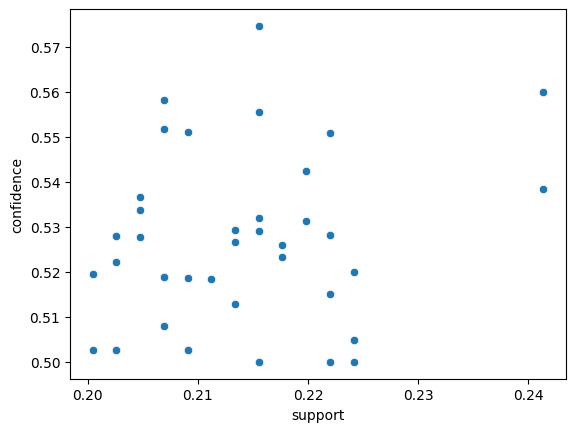

In [27]:
# Generate scatterplot confidence versus support
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

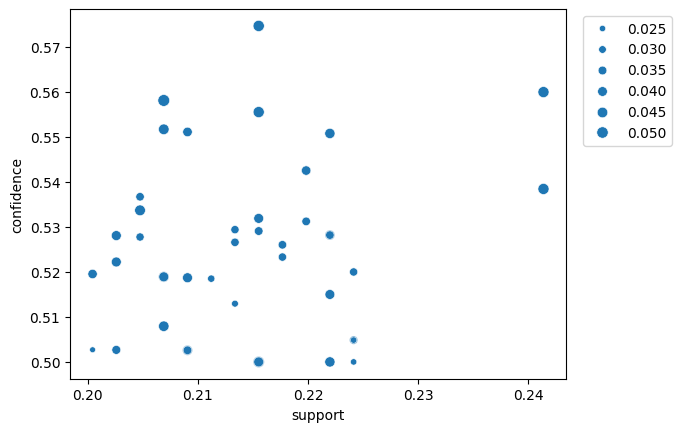

In [28]:
# Generate scatterplot confidence versus support

sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [29]:
# add extra another rule where support more than 0.2 for given itemset
filtered_rules = rules[(rules['antecedent support'] > 0.02)& #This ensures that the rules include antecedent itemsets that appear in more than 2% of the transactions.
                        (rules['consequent support'] >0.01) & #This ensures that the rules include consequent itemsets that appear in more than 1% of the transactions.
                        (rules['confidence'] > 0.45) & #This ensures that the rules have a confidence level greater than 0.45 (or 45%).
                        (rules['lift'] > 1.0)& #This ensures that the rules have a lift greater than 1.
                        (rules['support']>0.195)] #This ensures that the rules have a support value greater than 0.195 (or 19.5%).

In [30]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
3,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
8,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


In [31]:
def rules_to_coordinates(rules): #rules_to_coordinates is a function that takes a DataFrame rules as input.
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    #rules['antecedent']: This creates a new column in the DataFrame called 'antecedent'.
    #rules['antecedents']: This column contains sets of antecedents for each rule, such as {('milk',)}.
    #.apply(lambda antecedent: list(antecedent)[0]): This lambda function takes each set from the 'antecedents' column, converts it to a list, and extracts the first item from the list. It assumes that each antecedent set contains only one item.

    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    #rules['consequent']: This creates a new column in the DataFrame called 'consequent'.
    #rules['consequents']: This column contains sets of consequents for each rule, such as {('bread',)}.
    #.apply(lambda consequent: list(consequent)[0]): This lambda function extracts the first item from each consequent set, converting it to a single item.

    rules['rule'] = rules.index
    #rules['rule']: This creates a new column in the DataFrame called 'rule' that contains the index of each row.
    #rules.index: This refers to the index of the DataFrame, providing a unique identifier for each rule.

    return rules[['antecedent','consequent','rule']]
    #rules[['antecedent', 'consequent', 'rule']]: This returns a DataFrame with only the columns 'antecedent', 'consequent', and 'rule'.
    #This filtered DataFrame contains the essential information for each rule and is now ready for visualization or further processing.

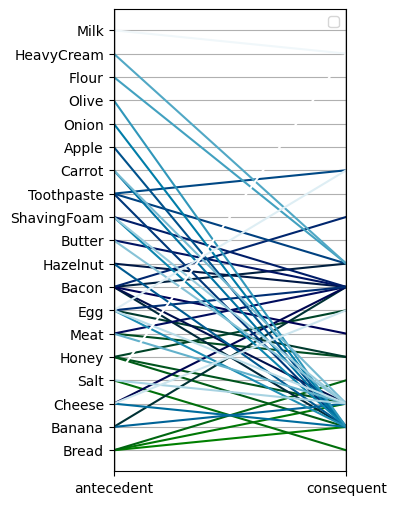

In [32]:
from pandas.plotting import parallel_coordinates
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules)
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

From the plot it seems like the bacon, banana, cheese can be used as cross-selling with other products, it also acts as something to be offered with antecedents that is low.